In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping

In [ ]:
train_dataset = pd.read_csv('Google_Stock_Price_Train.csv')
train_dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
train_dataset.shape

(1258, 6)

In [ ]:
training_set = train_dataset.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [ ]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
X_train = []
y_train = []

for i in range(60, train_dataset.shape[0]):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
print(X_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


In [ ]:
X_train.shape

(1198, 60)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train.shape

(1198, 60, 1)

In [ ]:
model = Sequential()

model.add(LSTM(units=50,
               return_sequences=True,
               input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100,
               return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,
               return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam',
              loss='mean_squared_error')

es = EarlyStopping(monitor='loss',
                   mode='min',
                   verbose=1,
                   patience=30)
model.fit(X_train,
          y_train,
          epochs=500,
          batch_size=32,
          callbacks=[es])

Epoch 1/500
38/38 [==============================] - 7s 16ms/step - loss: 0.0404
Epoch 2/500
38/38 [==============================] - 0s 13ms/step - loss: 0.0066
Epoch 3/500
38/38 [==============================] - 1s 16ms/step - loss: 0.0056
Epoch 4/500
38/38 [==============================] - 1s 18ms/step - loss: 0.0045
Epoch 5/500
38/38 [==============================] - 1s 18ms/step - loss: 0.0053
Epoch 6/500
38/38 [==============================] - 1s 17ms/step - loss: 0.0046
Epoch 7/500
38/38 [==============================] - 1s 13ms/step - loss: 0.0044
Epoch 8/500
38/38 [==============================] - 1s 13ms/step - loss: 0.0045
Epoch 9/500
38/38 [==============================] - 1s 13ms/step - loss: 0.0042
Epoch 10/500
38/38 [==============================] - 1s 14ms/step - loss: 0.0039
Epoch 11/500
38/38 [==============================] - 1s 14ms/step - loss: 0.0039
Epoch 12/500
38/38 [==============================] - 1s 13ms/step - loss: 0.0034
Epoch 13/500
38/38 [=====

In [ ]:
test_dataset = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_dataset.iloc[:, 1:2].values

In [ ]:
total_dataset = pd.concat((train_dataset['Open'], test_dataset['Open']), axis=0)
inputs = total_dataset[len(total_dataset) - len(test_dataset) - 60:].values
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [ ]:
inputs = inputs.reshape(-1, 1)
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [ ]:
inputs = sc.transform(inputs)

In [ ]:
X_test = []
for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


<function matplotlib.pyplot.show(close=None, block=None)>

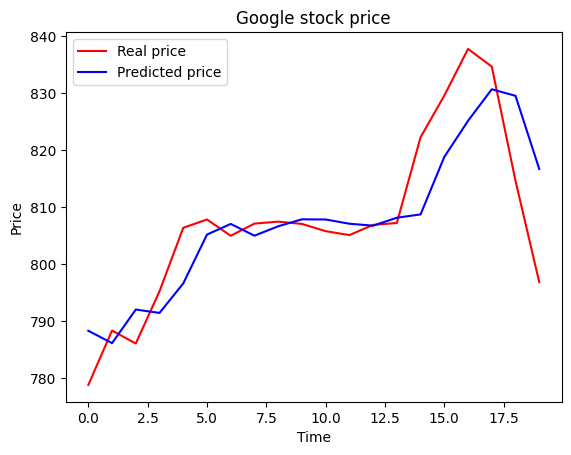

In [ ]:
plt.plot(real_stock_price,
         color='red',
         label='Real price')
plt.plot(predicted_stock_price,
         color='blue',
         label='Predicted price')
plt.title('Google stock price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show